# Some theoretical simulations

This notebook is used to generate some theoretical curves for the paper.

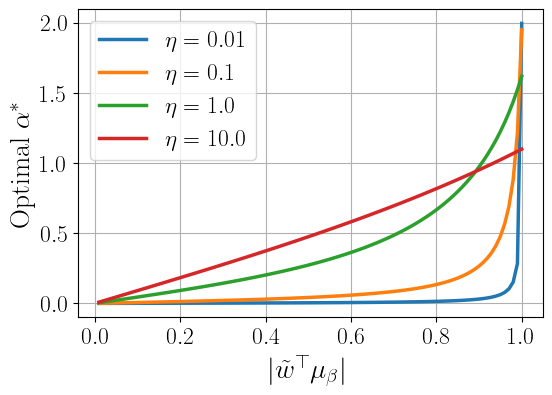

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})
# Parameters
n = 200
#p = 400
gamma = 1

def alphas(x, n, p, gamma):
    # x is the dot product between x_tilde and vmu_beta, but assumed to be of norm 1, so x is in [-1, 1]
    eta = p / n
    delta = (eta - gamma - 1 + np.sqrt((eta - gamma - 1)**2 + 4*eta*gamma)) / (2 * gamma)
    lam_Q = 2 + gamma * (1 + delta)

    denom = gamma * (1 + delta) * (lam_Q - (lam_Q - eta) * x**2)
    alpha_max = eta * (1 + gamma * (1 + delta)) * x / denom
    alpha_min = - 1 / (gamma * (1 + delta) * x)
    return alpha_max, alpha_min

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 4))
ps = [2, 20, 200, 2000]
x = np.linspace(0.01, 1, 100)
for p in ps:
    alphas_max, alphas_min = alphas(x, n, p, gamma)
    ax.plot(x, alphas_max, label = f'$\eta = {p / n}$', linewidth = linewidth)
    
ax.legend(fontsize = labelsize)
ax.set_xlabel('$| \\tilde w^\\top \mu_\\beta |$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.grid()
path = './results-plot' + f'/optimal-alpha-arbitrary-n-{n}-gamma-{gamma}.pdf'
fig.savefig(path, bbox_inches='tight')
plt.show()


### $\alpha^*$ with the regularization $\gamma$

/var/folders/md/73tlwn611t99m1h0qypsxykc0000gn/T/ipykernel_72871/3327878152.py:16: RuntimeWarning: divide by zero encountered in divide
  alpha_min = - 1 / (gamma * (1 + delta) * x)


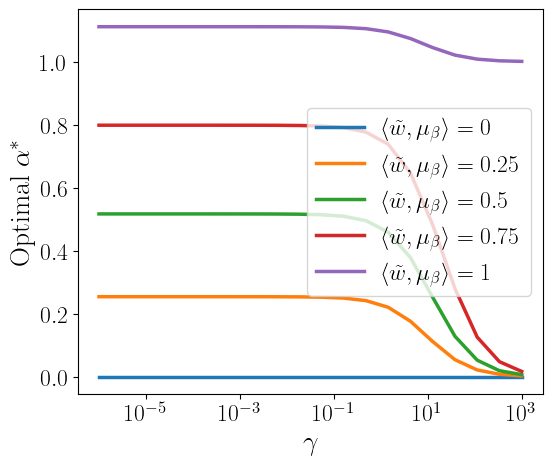

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})
# Parameters
n = 40
p = 400

def alphas(x, n, p, gamma):
    # x is the dot product between x_tilde and vmu_beta, but assumed to be of norm 1, so x is in [-1, 1]
    eta = p / n
    delta = (eta - gamma - 1 + np.sqrt((eta - gamma - 1)**2 + 4*eta*gamma)) / (2 * gamma)
    lam_Q = 2 + gamma * (1 + delta)

    denom = gamma * (1 + delta) * (lam_Q - (lam_Q - eta) * x**2)
    alpha_max = eta * (1 + gamma * (1 + delta)) * x / denom
    alpha_min = - 1 / (gamma * (1 + delta) * x)
    return alpha_max, alpha_min

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 5))
gammas = np.logspace(-6, 3, 20)
scs = [0, 0.25, 0.5, 0.75, 1]
for x in scs:
    alphas_max, alphas_min = alphas(x, n, p, gammas)
    ax.semilogx(gammas, alphas_max, label = f'$\langle \\tilde w, \mu_\\beta \\rangle = {x}$', linewidth = linewidth)
    
ax.legend(fontsize = labelsize)
ax.set_xlabel('$\gamma$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
#path = './results-plot' + f'/optimal-alpha-arbitrary-n-{n}.pdf'
#fig.savefig(path, bbox_inches='tight')
plt.show()


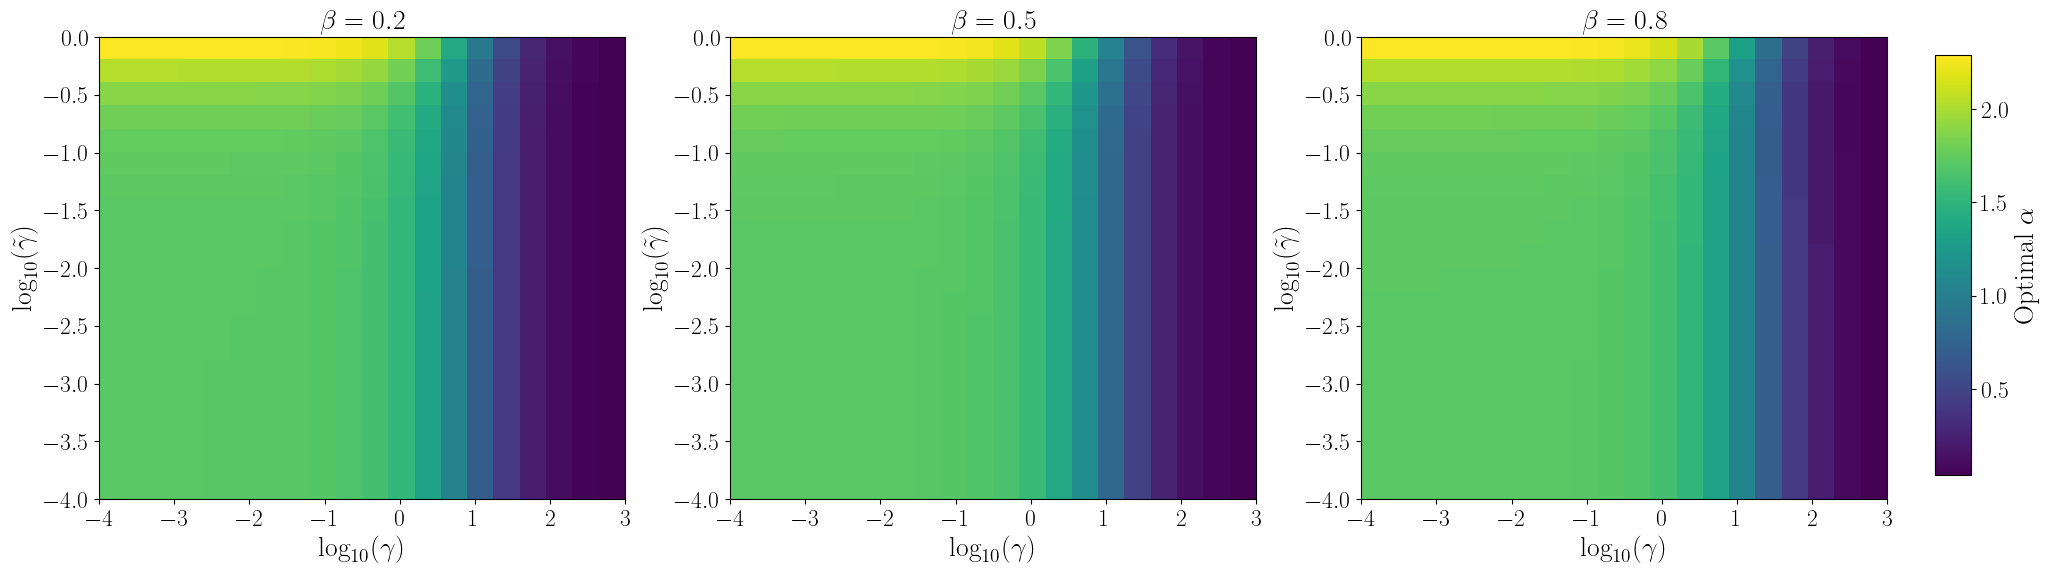

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rmt_results import optimal_alphas

plt.rcParams.update({"text.usetex": True, "font.family": "STIXGeneral"})

# Parameters
N = 2000
n = 40
p = 400

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(1, 3, figsize=(24, 6))
gammas_pre = np.logspace(-4, 0, 20)
gammas_ft = np.logspace(-4, 3, 20)

betas = [0.2, 0.5, 0.8]

for k, beta in enumerate(betas):
    alpha_matrix = np.zeros((len(gammas_pre), len(gammas_ft)))
    for i, gamma_pre in enumerate(gammas_pre):
        for j, gamma_ft in enumerate(gammas_ft):
            alpha_matrix[i, j] = optimal_alphas(N, n, p, 1, 1, beta, gamma_pre, gamma_ft)[0]

    im = ax[k].imshow(alpha_matrix, 
                      extent=[np.log10(gammas_ft[0]), np.log10(gammas_ft[-1]), 
                              np.log10(gammas_pre[0]), np.log10(gammas_pre[-1])],
                      origin='lower', 
                      aspect='auto', 
                      cmap='viridis')

    ax[k].set_xlabel(r'$\log_{10}(\gamma)$', fontsize=fontsize)
    ax[k].set_ylabel(r'$\log_{10}(\tilde \gamma)$', fontsize=fontsize)
    ax[k].set_title(fr'$\beta = {beta}$', fontsize=fontsize)
    ax[k].tick_params(labelsize=labelsize)

# Reserve space on the right and add colorbar
fig.subplots_adjust(right=0.87)  # Leave room on right
cbar_ax = fig.add_axes([0.89, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'Optimal $\alpha$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

plt.show()


## Optimal $\alpha^*$ with $\beta$

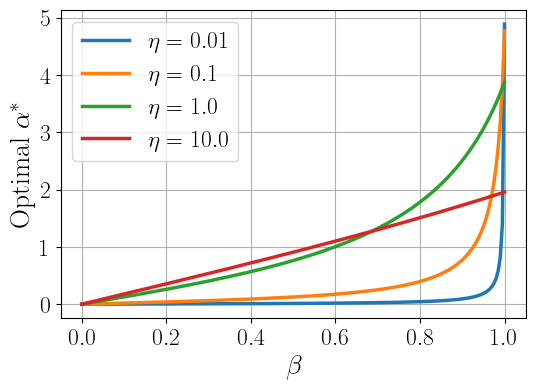

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from rmt_results import optimal_alphas
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})
# Parameters
N = 2000
n = 200
#p = 400
gamma_ft = 1
mu = 1
mu_orth = 1
gamma_pre = 1

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 4))
ps = [2, 20, 200, 2000]
betas = np.linspace(0, 1, 200)
for p in ps:
    alphas_max, alphas_min = optimal_alphas(N, n, p, mu, mu_orth, betas, gamma_pre, gamma_ft)
    ax.plot(betas, alphas_max, label = f'$\eta = {p / n}$', linewidth = linewidth)
    
ax.legend(fontsize = labelsize)
ax.set_xlabel('$\\beta$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.grid()
path = './results-plot' + f'/optimal-alpha-ridge-N-{N}-n-{n}-gamma_pre-{gamma_pre}-gamma_ft-{gamma_ft}.pdf'
fig.savefig(path, bbox_inches='tight')
plt.show()

-----

# Quantifying $\beta$ and then $\alpha^*$ 

Here is what we will do:

- Quantify $\beta$, $\| \mu \|$ and $\| \mu_\beta \|$ using the method that el mahdi told me.
- The use the theoretical of $\alpha^*$ to compute it.
- Try it using the experiments.

In [1]:
import torch
from transformers import AutoModelForSequenceClassification
from model import *
from dataset import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device: ", device)

# Load the model and tokenizer
model_name = 'roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model = model.to(device)
model.eval()

# Load dataset
imdb_tokenized = tokenization(model_name)
train_dataset = IMDBDataset(imdb_tokenized, partition_key="train")

/Users/aelfirdo/Desktop/Research/Transfer-Learning/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device:  cpu


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 10000/10000 [00:02<00:00, 4175.00 examples/s]


In [2]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [9]:
# Do an inference of the source model and get noisy labels
from torch.utils.data import DataLoader
from torch.nn.functional import softmax

batch_size = 32
dataloader = DataLoader(train_dataset, batch_size=batch_size)

all_preds = []

with torch.no_grad():
    for batch in tqdm(dataloader):
        outputs = model(batch['input_ids'], attention_mask = batch['attention_mask'], labels = batch['label'])
        logits = outputs.logits
        probs = softmax(logits, dim=-1)
        preds = torch.argmax(probs, dim=-1)
        all_preds.extend(preds.cpu().tolist())

  1%|          | 8/1094 [00:45<1:43:08,  5.70s/it]


KeyboardInterrupt: 

In [ ]:
# Vectorize the text data

# Compute the alignment score beta

# Compute alpha_star finally

In [22]:
imdb_dataset = load_dataset(
        "csv",
        data_files={
            "train": op.join("data/sentiment", "train.csv")
        },
    )
print(imdb_dataset)

Generating train split: 35000 examples [00:00, 80084.06 examples/s]

DatasetDict({
    train: Dataset({
        features: ['index', 'text', 'label'],
        num_rows: 35000
    })
})


In [ ]:
train_texts = imdb_dataset['train']
texts = train_texts['text']
texts

['When we started watching this series on cable, I had no idea how addictive it would be. Even when you hate a character, you hold back because they are so beautifully developed, you can almost understand why they react to frustration, fear, greed or temptation the way they do. It\'s almost as if the viewer is experiencing one of Christopher\'s learning curves.<br /><br />I can\'t understand why Adriana would put up with Christopher\'s abuse of her, verbally, physically and emotionally, but I just have to read the newspaper to see how many women can and do tolerate such behavior. Carmella has a dream house, endless supply of expensive things, but I\'m sure she would give it up for a loving and faithful husband - or maybe not. That\'s why I watch.<br /><br />It doesn\'t matter how many times you watch an episode, you can find something you missed the first five times. We even watch episodes out of sequence (watch season 1 on late night with commercials but all the language, A&E with lan

In [28]:
labels = train_texts['label']
print(labels)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

In [33]:
import numpy as np

a = np.array([1, 0, 2])
b = np.random.randn(3, 4)
print(b.shape)
c = a[:, np.newaxis] * b 
print(c.shape)

(3, 4)
(3, 4)


In [35]:
np.mean(c, axis = 0)

array([ 0.06173462,  0.14977177, -0.26362439,  0.12085423])

In [6]:
import numpy as np
a = np.array([1, 1, 1, 0, 0, 1, 0])
b = (a + 1) % 2
print(b)


[0 0 0 1 1 0 1]


100%|██████████| 100/100 [00:00<00:00, 222745.83it/s]
/var/folders/md/73tlwn611t99m1h0qypsxykc0000gn/T/ipykernel_8936/3031679850.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize = labelsize)


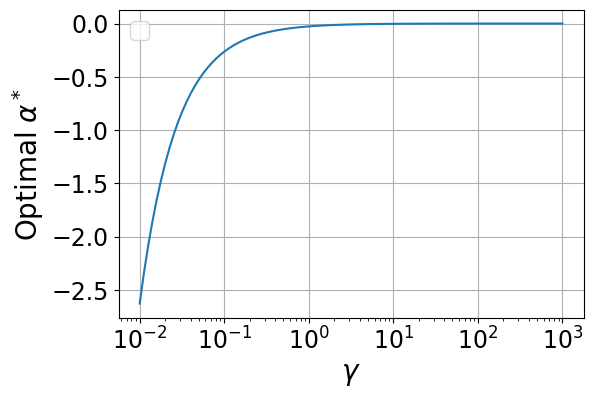

In [11]:
import numpy as np
from rmt_results import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Computing alpha star for some given parameters
def llm_optimal_alpha(n, p, beta, gamma):
    eta = p/n 
    delta = Delta(eta, gamma)
    lam = (0.265)**2 + 1 + gamma* (1 + delta)
    num = eta * (1 + gamma * (1 + delta)) * beta
    den = gamma * (1 + delta) * (lam * (0.265)**2 - (lam - eta)* beta**2)
    return num / den 

# Parmeters for the method we used to estimate beta
n = 35000
p = 384
beta = 0.525

gammas = np.logspace(-2, 3, 100)
alphas = []
for gamma in tqdm(gammas):
    alphas.append(llm_optimal_alpha(n, p, beta, gamma))

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 4))
ax.semilogx(gammas, alphas)
ax.legend(fontsize = labelsize)
ax.set_xlabel('$\gamma$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.grid()
#path = './results-plot' + f'/optimal-alpha-arbitrary-n-{n}.pdf'
#fig.savefig(path, bbox_inches='tight')
plt.show()

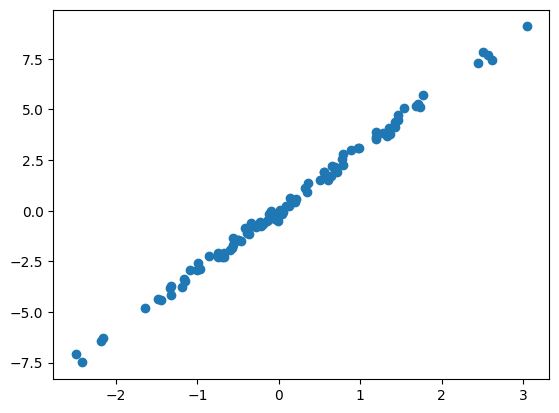

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
p = 1
X = np.random.randn(n, p)

std = 0.2
Z = std * np.random.randn(n, p)
w = 3

Y = w * X + Z

plt.scatter(X, Y)